This homework will have a mix of theory and coding. Turn the theory questions in at class Friday, Oct. 18 and upload the code to canvas.

In [1]:
import numpy as np
from casadi import *
import matplotlib.pyplot as plt

# Coding Problem 

The Rayleigh problem is a common benchmark for constrained optimal control. Defined as follows.

\begin{align*}
& \min && \int_0^{4.5} (u(t)^2 + x_0(t)^2)dt \\
& \textrm{subject to} && \dot x_0(t) = x_1(t) \\
&&& \dot x_1(t) = -x_0(t) + x_1(t)(1.4 - 0.14 x_1(t)^2) + 4 u(t) \\
&&& u+x_0(t)/6 \le 0 \\
&&& x_0(0) = -5 \\
&&& x_1(0) = -5
\end{align*}

The relevant quantities are defined below.

In [2]:
p = 0.14

# An augmented state vector that includes the running cost and
# the original state
y = MX.sym('y',3)
# The original state
x = y[1:,0]
# The input
u = MX.sym('u',1)

# cost
ell = u**2 + x[0]**2

# dynamics
f = vertcat(x[1],-x[0]+x[1]*(1.4 - p*x[1]**2)+4*u)

# Augmented Dynamics
# This includes the running cost, as well as a dummy index for time.
t_sym = MX.sym('t_sym',1)
f_aug = vertcat(ell,f)
f_aug_fun = Function('f_aug',[t_sym,y,u],[f_aug])

# constraint
g = u + x[0]/6
g_fun = Function('g',[y,u],[g])

Use direct collocation to solve the Rayleigh problem using each of the following collocation vectors:

$$
c = 
=\begin{bmatrix}
0.
\end{bmatrix}, \quad
\begin{bmatrix}
0.5
\end{bmatrix}, \quad
\begin{bmatrix}
1.
\end{bmatrix}, \quad
\begin{bmatrix}
0 \\
1
\end{bmatrix}, \quad
\begin{bmatrix}
1/2 - \sqrt{3}/6 \\
1/2 + \sqrt{3}/6 
\end{bmatrix}, \quad
\begin{bmatrix}
0 \\
1/2 \\
1
\end{bmatrix},
$$

In particular, for each collocation vector, $c$, and each $N \in \{10,20,30\}$,
solve the problem on a grid of equally spaces time points $0=t_0<t_1<\cdots < t_N = 4.5$.

The goal is to see how the solution accuracy improves as $N$ increases.

Make two plots for each $c$, one for $x_0(t)$ and the other for $x_1(t)$. Plot the results for the different values of $N$ together to compare them. Use markers or a legend to ensure that the results for different $N$ can be distinguished. Label the plots so it is clear what $c$ is being examined.

In [3]:
# Make your solution here
# It is probably helpful to use functions / loops as in last week's solution




******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



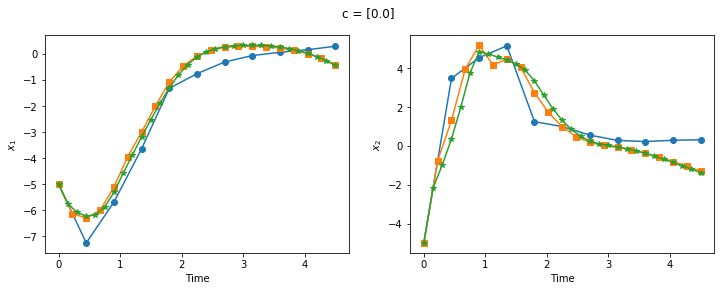

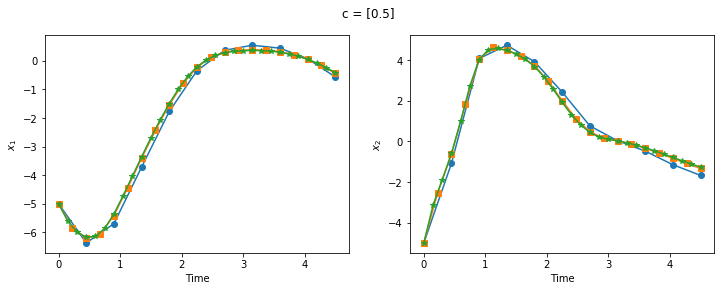

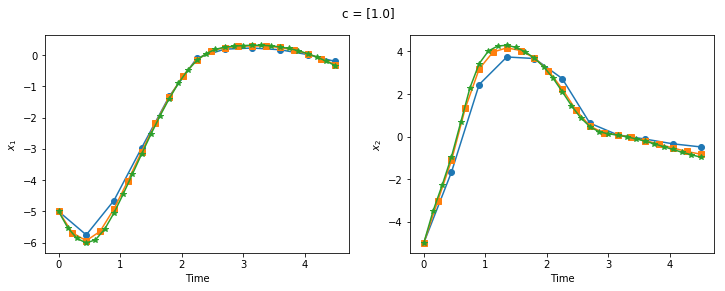

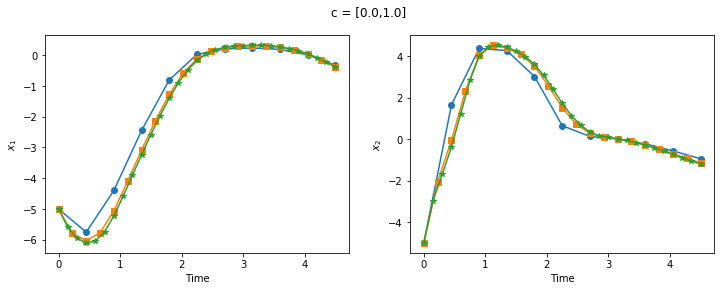

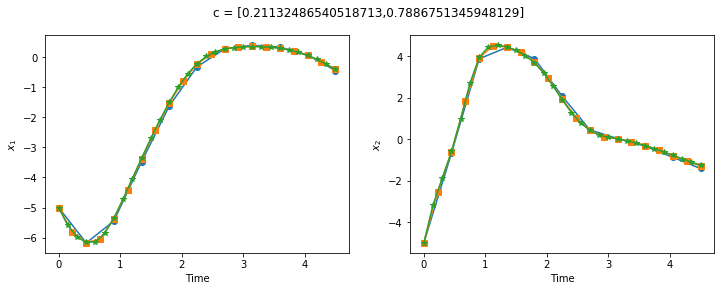

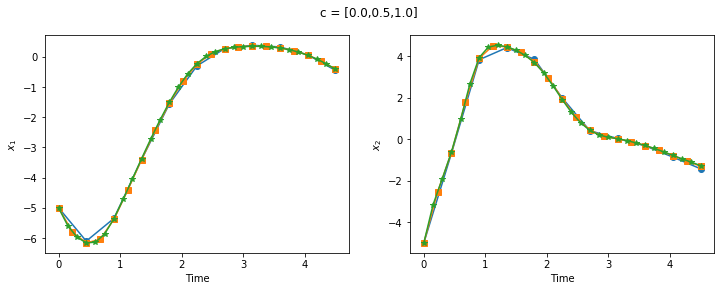

In [4]:
import collocation as cl

T_max = 4.5
C_list = [np.array([0.]),
          np.array([.5]),
          np.array([1.]),
          np.array([0,1.]),
          np.array(collocation_points(2,'legendre')),
          np.array([0,.5,1])]


x0 = np.array([0.,-5,-5])

NumNodes = [10,20,30]
Markers = ['o','s','*','.']
for c in C_list:

    fig,ax = plt.subplots(1,2,figsize=(12,4))
    
    c_str = ','.join([str(ci) for ci in c])
    fig.suptitle('c = [%s]' % c_str)
    for N,m in zip(NumNodes,Markers):
        Time = np.linspace(0,T_max,N+1)
        X_opt,U_opt = cl.collocation_optimize(f_aug_fun,g_fun,Time,x0,1,c)

    
        for i in range(2):
            ax[i].plot(Time,X_opt[i+1],marker=m)
            ax[i].set_xlabel('Time')
            ax[i].set_ylabel(r'$x_{%d}$' % (i+1,) )

# Value functions in matrix / vector form.

Given an MDP, described by $p(s',r|s,a)$ and policy $\pi(a|s)$, we can get Markov chain by marginalizing $a$ and $r$:
$$
p_{\pi}(s'|s) = \sum_{r,a} p(s',r|s,a)\pi(a|s).
$$


Similarly, the expected reward at state $s$, $\bar r(s)$ can be computed by
$$
\bar r(s) = \sum_{r,a,s'}p(s',r|s,a) \pi(a|s)r
$$

Assume that $s$ takes values $1,\ldots,n$. Let $P$ be the $n\times n$ matrix with $P_{i,j} = p_{\pi}(j|i)$ and let $\bar r$ be the column vector formed by stacking the entries of $\bar r(i)$. In this notation, the Bellman equation for $v_{\pi}$ can be expressed by 
$$
v_{\pi} = \bar r + \gamma P v_{\pi}.
$$

Note that $P$ is a *row-stochastic* matrix. That is, it has non-negative entries and its rows sum to $1$.

For notational simplicity, below we will analyze the equation:

$$
v = r + \gamma P v
$$
where $r$ and $v$ are $n\times 1$ vectors, $\gamma \in [0,1]$, and $P$ is row stochastic.

When discussing the corresponding Markov chain in probabilistic terms, we will denote the transition probabilities by $p(s'|s)$, where $P_{s,s'}=p(s'|s)$.

# Theory Question 1

Recall that the $\infty$-norm for vectors is defined by $\|w\|_{\infty} = \max_{i=1,\ldots,n} |w_i|$.

Show that for all $w\in \mathbb{R}^n$, we have that $\|Pw\|_{\infty} \le \|w\|_{\infty}$. 

Furthermore, show that if $\lambda$ is an eigenvalue of $P$ then $|\lambda | \le 1$.

# Theory Question 2

Show that if $\gamma \in [0,1)$, then for every $r$ there is a unique $v$ such that $v = r + \gamma Pv$.

# Theory Question 3

Let $S_0,S_1,S_2,\ldots$ be a sequence of states generated by the Markov chain associated with $P$.

Now we will consider the case that the Markov chain always reaches a terminal state. Specifically, we assume that there is a state $\hat s$ such that $p(\hat s | \hat s) = 1$ and an integer $M$ such that $p(S_t = \hat s | S_0=i) > 0 $ for all $t\ge M$ and all $i=1,\ldots, n$.



Without loss of generality, assume that $\hat s = n$. In this case $P$ can be expressed as
$$
P = \begin{bmatrix}
Q & b \\
0 & 1
\end{bmatrix}.
$$

Show that for each $i,j \in \{1,\ldots,n-1\}$, $p(S_t = j| S_0=i) = e_i^\top Q^t e_j$, where $e_i$ and $e_j$ are standard unit vectors with $1$ in the respective $i$ and $j$ columns, zeros elsewhere. 

Show further that for each $i,j \in \{1,\ldots,n-1\}$ we must have that $\lim_{t\to\infty} p(S_t=j|S_0=i) =0$.

# Theory Question 4

Show that if $\lambda$ is an eigenvalue of $Q$, then $|\lambda | < 1$.

# Theory Question 5

Assume that $r(n) = 0$. Show that if $v(n)=0$, then there are unique values of $v(1),\ldots,v(n-1)$ such that $v=r+Pv$. 

# Theory Question 6

Let $T$ be the first time $t$ such that $S_t = n = \hat s$. Find an expression for $\mathbb{E}[T|S_0=i]$, for $i=1,\ldots,n-1$ in terms of $Q$.